In [237]:
import wandb
from collections import defaultdict
import pandas as pd
import numpy as np

import random

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import display_html
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
BASELINES = ["DBMS\n(Diff DB,Test Env)", "DBMS\n(Test DB,Test Env)"]

HUES = {}

# Base models
HUES["DBMS\n(Diff DB,Test Env)"] = "Red"  # Red is a strong color, good for contrast.
HUES["DBMS\n(Test DB,Test Env)"] = "Orange"  # Orange is distinct from red and provides good contrast.

# Your model
HUES["Factorized (Osprey)"] = "RoyalBlue"  # A bright and prominent shade of blue.

# Other GCN models
HUES["GCN"] = "LightGreen"  # A lighter shade for distinction from darker colors.
HUES["GCN\n(Diff DB,Test Env)"] = "Cyan"  # Cyan is visually distinct from blue and green.
HUES["GCN\n(Test DB,Test Env)"] = "LightGray"  # A neutral, unobtrusive color for the least focus.

# Factorized models
HUES["Factorized\n(No Pre-training)"] = "YellowGreen"  # A yellow-green shade for differentiation.

# GCN-Transformer models
HUES["GCN-Transformer (TestDB)"] = "SlateGray"  # A neutral color that doesn't dominate.

In [239]:
api = wandb.Api()
runs = api.runs("pari/LatencyPredictor",
    {"$and": [
      {"$or": [
            {"$and": [
                {"tags":"imdb-learning-curves2"},
            ]},
      ]} 
    ]
    })

print(f"Found {len(runs)} runs")

Found 20 runs


In [240]:
import time

def load_run_data(runs):
    start = time.time()
    dfs = []
    for run in runs:
        df = run.history()
        for k,v in run.config.items():
            if not k.startswith("_") or not k.contains("/"):
                df[k] = v
        
        dfs.append(df)
        
#         if not run.config["arch"] == "gcn":
#             continue
#         data = defaultdict(list)
#         for hdata in runs[0]._full_history():
#             for k,v in hdata.items():
#                 if k in ["train-train_loss"]:
#                     continue
#                 if "_" != k[0] and k != "epoch":
#                     if v != None:
#                         data[k].append(v)

#                 elif k == "epoch" and v not in data["epoch"]:
#                     data["epoch"].append(v)
        
#         for k,v in data.items():
#             print(k, len(v))
            
#         data = pd.DataFrame(data)
#         data["Tags"] = run.Tags[0]
#         data["name"] = run.name

#         for k,v in run.config.items():
#             if not k.startswith("_") or not k.contains("/"):
#                 data[k] = v

        #dfs.append(data)

    print("took: ", time.time()-start)
    return pd.concat(dfs)

In [241]:
#runs[0]

In [242]:
df = load_run_data(runs)

took:  10.273329257965088


In [243]:
# data = defaultdict(list)
# for hdata in runs[0]._full_history():
#     for k,v in hdata.items():
#         if "_" != k[0] and k != "epoch":
#             if v != None:
#                 data[k].append(v)
                
#         elif k == "epoch" and v not in data["epoch"]:
#             data["epoch"].append(v)
        
# # for k,v in data.items():
# #     print(k, len(v))

In [244]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Reset the index of the DataFrame to ensure it's unique
# df = df.reset_index(drop=True)

# # Set the aesthetic style of the plots
# sns.set_style("whitegrid")

# # Create the line plot
# plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
# sns.lineplot(data=df, x='epoch', y='new_env_unseen-LatencyQError-mean', hue='arch')

# # Set the y-axis limit
# plt.ylim(0, 50)

# # Rename the legend and adjust its position if needed
# plt.legend(title='Model', loc='upper right')

# # Optional: additional customization
# plt.xlabel('Epoch')  # Set x-axis label
# plt.ylabel('Mean Latency QError')  # Set y-axis label
# plt.title('Performance Over Epochs')  # Set the title of the plot

# # Show the plot
# plt.show()


In [245]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Reset the index of the DataFrame to ensure it's unique
# df = df.reset_index(drop=True)

# # Rename 'GCN' to 'GCN\n(TrainDB, New Env)' in the 'arch' column
# #df['arch'] = df['arch'].replace('gcn', 'GCN')
# #df['arch'] = df['arch'].replace('factorized', 'Factorized (Osprey)')

# # Set the aesthetic style of the plots
# sns.set_style("whitegrid")

# # Create a figure with two subplots
# fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))  # Adjust figure size (width, height) as needed

# # Plot for 'train-LatencyQError-mean'
# sns.lineplot(data=df, x='epoch', y='train-LatencyQError-mean', hue='arch', ax=axs[0])
# axs[0].set_title('Training Env')
# axs[0].set_ylim(0, 50)
# axs[0].legend(title='', loc='upper right', frameon=False)
# axs[0].set_xlabel('')  # Remove x-axis label for the top plot

# # Plot for 'new_env_unseen-LatencyQError-mean'
# sns.lineplot(data=df, x='epoch', y='new_env_unseen-LatencyQError-mean', hue='arch', ax=axs[1])
# axs[1].set_title('New Environments')
# axs[1].set_ylim(0, 50)
# axs[1].legend(title='', loc='upper right', frameon=False)

# # Set common labels
# for ax in axs:
#     ax.set_ylabel('Mean Latency QError')

# # Adjust layout for better fit and to prevent label overlap
# plt.tight_layout()

# #plt.savefig("LearningCurves-MultiTenant.pdf", bbox_inches="tight")
# # Show the plot
# plt.show()


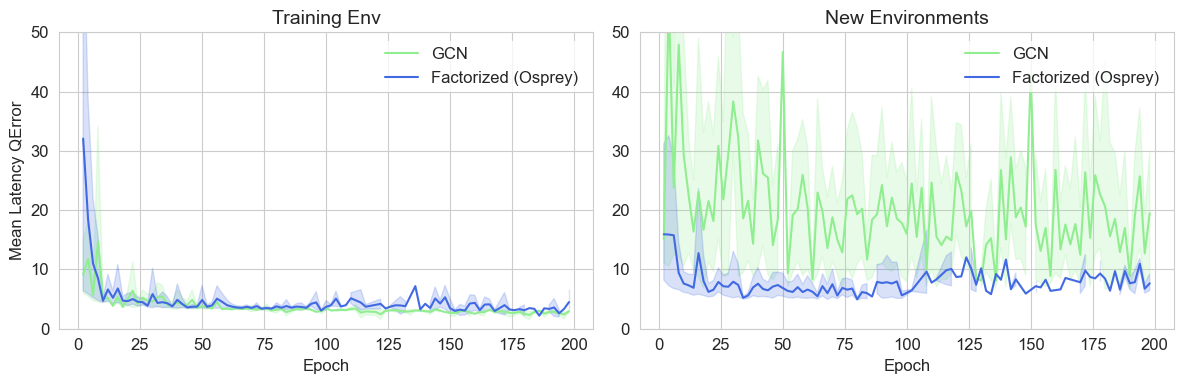

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set font sizes
mpl.rcParams.update({'font.size': 12})  # Adjust the base font size
mpl.rcParams.update({'axes.titlesize': 14})  # Adjust the title font size
mpl.rcParams.update({'axes.labelsize': 12})  # Adjust the axis label font size

# Reset the index of the DataFrame to ensure it's unique
df = df.reset_index(drop=True)

# Rename 'gcn' and 'factorized' in the 'arch' column
df['arch'] = df['arch'].replace('gcn', 'GCN')
df['arch'] = df['arch'].replace('factorized', 'Factorized (Osprey)')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # Adjust figure size (width, height) as needed

# Plot for 'train-LatencyQError-mean'
plot0 = sns.lineplot(data=df, x='epoch', y='train-LatencyQError-mean', hue='arch', ax=axs[0], 
                    palette=HUES)
axs[0].set_title('Training Env', fontsize=14)
axs[0].set_ylim(0, 50)
legend0 = axs[0].legend(title='', loc='upper right')
legend0.get_frame().set_linewidth(0.0)  # Remove legend frame
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Mean Latency QError')

# Plot for 'new_env_unseen-LatencyQError-mean'
plot1 = sns.lineplot(data=df, x='epoch', y='new_env_unseen-LatencyQError-mean', hue='arch', ax=axs[1],
                    palette=HUES)
axs[1].set_title('New Environments', fontsize=14)
axs[1].set_ylim(0, 50)
legend1 = axs[1].legend(title='', loc='upper right')
legend1.get_frame().set_linewidth(0.0)  # Remove legend frame
axs[1].set_xlabel('Epoch')
#axs[1].set_ylabel('Mean Latency QError')
axs[1].set_ylabel('', fontsize=0)

# Adjust layout for better fit and to prevent label overlap
plt.tight_layout()

plt.savefig("LearningCurves-MultiTenant.pdf", bbox_inches="tight")
# Show the plot
plt.show()
